# Model

In [32]:
%run ../../data/api_keys.ipynb
%run ../modulos.ipynb
plt.style.use('default') 

In [2]:
def request_github(url,personal_access=personal_access_token):
    headers = {"Authorization": f"Bearer {personal_access}","Accept": "application/vnd.github.v3.star+json","content-type": "application/json"}

    res=requests.get(url ,headers=headers)
    return res.json()

## Información Histórica

In [3]:
def lista_fecha_a_df(lista,nombre, plot=False):
  df=pd.DataFrame({nombre:lista})
  df[f'freq_{nombre}']=pd.to_datetime(df[nombre]).dt.date
  df1=df.groupby(f'freq_{nombre}').size().cumsum()
  if plot: df1.plot()
  return df1

### Estrellas

In [4]:
res_repo=request_github('https://api.github.com/repos/freeCodeCamp/freeCodeCamp')
num_total_estrellas=res_repo['stargazers_count']

In [5]:
def request_github_no_json(url,personal_access=personal_access_token):
    headers = {"Authorization": f"Bearer {personal_access}","Accept": "application/vnd.github.v3.star+json","content-type": "application/json"}

    res=requests.get(url ,headers=headers)
    return res

In [6]:
def create_stargazers_count(user,repo):
    """this function creates the stargazers count dataframe"""

    star_count_url = "https://api.github.com/repos/"+user+"/"+repo
    # response = requests.request("GET", star_count_url)
    response = request_github_no_json(star_count_url)
    total_star_count = response.json()['stargazers_count']
    loops = int(total_star_count / 100) + 1
    star_trends_url = "https://api.github.com/repos/"+user+"/"+repo+"/stargazers"
    star_trends_resp = []
    headers = {
    "Accept": "application/vnd.github.v3.star+json",
    "content-type": "application/json"
    }
    for page in range(loops):
        # response = requests.request("GET", star_trends_url+"?per_page=100"+"&page="+str(page+1), headers=headers).json()
        response = request_github_no_json(star_trends_url+"?per_page=100"+"&page="+str(page+1)).json()
        star_trends_resp.extend(response)

    df = json_normalize(star_trends_resp)

    #df['starred_date'] = pd.to_datetime(df['starred_at']).dt.date

    #star_trend_df = df.groupby(['starred_date'])['starred_date'].count().cumsum().reset_index(name="count")

    return df

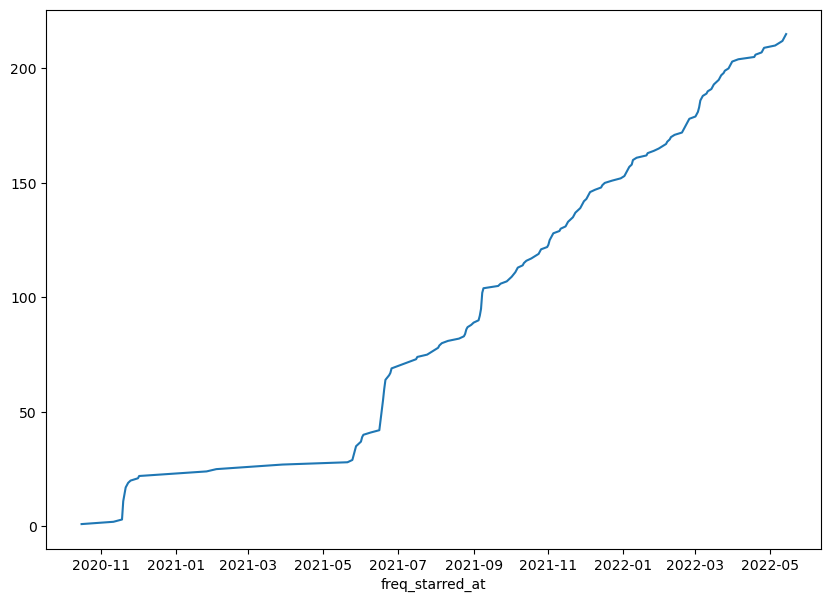

In [7]:
df_stars=create_stargazers_count('pysentimiento','pysentimiento')
plt.figure(figsize=(10,7))
starred_acum_df= lista_fecha_a_df(df_stars['starred_at'], 'starred_at', True)

In [66]:
intervalos = pd.qcut(starred_acum_df, q=4, retbins=True)[1]
intervalos

array([  1.  ,  80.25, 131.5 , 168.75, 215.  ])

In [75]:
intervalos[2:] / intervalos[1:-1]

array([1.63862928, 1.28326996, 1.27407407])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=152a8359-c113-4e0b-abe1-792bdde45c2e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>